## 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


### Getting data

In [2]:
df=pd.read_csv(r'C:\Users\Rgarud\Desktop\train_u6lujuX_CVtuZ9i train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
#2-1Renaming Column
df.columns=df.columns.str.lower()

df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income',
            'co-applicant_income','loan_amount', 'loan_amount_term', 'credit_history', 'property_area','loan_status'] 

In [6]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#2-2-Checking null values
df.isnull().sum()

loan_id                 0
gender                 13
married                 3
dependents             15
education               0
self_employed          32
applicant_income        0
co-applicant_income     0
loan_amount            22
loan_amount_term       14
credit_history         50
property_area           0
loan_status             0
dtype: int64

In [8]:
df.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.count()

loan_id                614
gender                 601
married                611
dependents             599
education              614
self_employed          582
applicant_income       614
co-applicant_income    614
loan_amount            592
loan_amount_term       600
credit_history         564
property_area          614
loan_status            614
dtype: int64

In [10]:
summ=df["loan_amount"].sum()
summ

86676.0

In [11]:
total_no=df["loan_amount"].count()
total_no

592

In [12]:
summ/total_no    #mean calculated 

146.41216216216216

In [13]:
df.head(20)

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [14]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


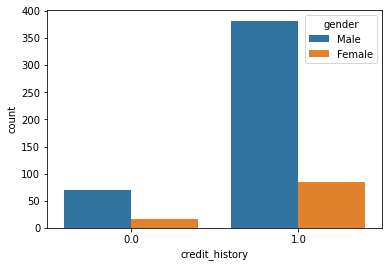

In [15]:
sns.countplot(x="credit_history",data=df,hue="gender")

In [16]:
df["loan_amount"].mean()

146.41216216216216

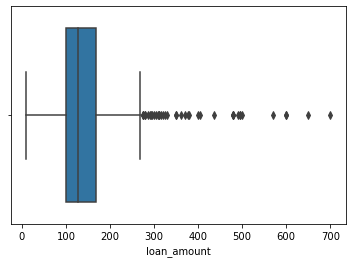

In [17]:
sns.boxplot("loan_amount",data=df)

In [18]:
df['loan_amount']=df['loan_amount'].fillna(df['loan_amount'].mean())  

In [19]:
df['credit_history']=df['credit_history'].fillna(df['credit_history'].median())   

In [20]:
df.shape

(614, 13)

In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(542, 13)

In [23]:
df.isnull().sum()

loan_id                0
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
co-applicant_income    0
loan_amount            0
loan_amount_term       0
credit_history         0
property_area          0
loan_status            0
dtype: int64

In [24]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
df.shape

(542, 13)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              542 non-null    object 
 1   gender               542 non-null    object 
 2   married              542 non-null    object 
 3   dependents           542 non-null    object 
 4   education            542 non-null    object 
 5   self_employed        542 non-null    object 
 6   applicant_income     542 non-null    int64  
 7   co-applicant_income  542 non-null    float64
 8   loan_amount          542 non-null    float64
 9   loan_amount_term     542 non-null    float64
 10  credit_history       542 non-null    float64
 11  property_area        542 non-null    object 
 12  loan_status          542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


In [27]:
df.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.518139,341.955720,0.863469
std,5506.461371,2543.801628,81.749385,65.441582,0.343669
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


### 2-3-Label Encoder for Dependents

In [28]:
df.dtypes

loan_id                 object
gender                  object
married                 object
dependents              object
education               object
self_employed           object
applicant_income         int64
co-applicant_income    float64
loan_amount            float64
loan_amount_term       float64
credit_history         float64
property_area           object
loan_status             object
dtype: object

In [29]:
df["dependents"]

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: dependents, Length: 542, dtype: object

In [30]:
type(df['dependents'].iloc[0])

str

In [31]:
df['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [32]:
model6=LabelEncoder()

In [33]:
model6.fit(df['dependents'])

LabelEncoder()

In [34]:
df['dependents']= model6.transform(df['dependents'])

In [35]:
df["dependents"]

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: dependents, Length: 542, dtype: int32

In [36]:
df.dtypes    #dependents dtype object changed to int

loan_id                 object
gender                  object
married                 object
dependents               int32
education               object
self_employed           object
applicant_income         int64
co-applicant_income    float64
loan_amount            float64
loan_amount_term       float64
credit_history         float64
property_area           object
loan_status             object
dtype: object

### 3-Exploratory Data Analysis

#### 3-1- Visualization

In [37]:
df[df['loan_status']=='Y'].count()['loan_status']

376

In [38]:
df[df['loan_status']=='N'].count()['loan_status']

166

In [39]:
df["loan_status"].value_counts()         #alternate way to find Y and N count from loan_status

Y    376
N    166
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Distribution of Loan Status')

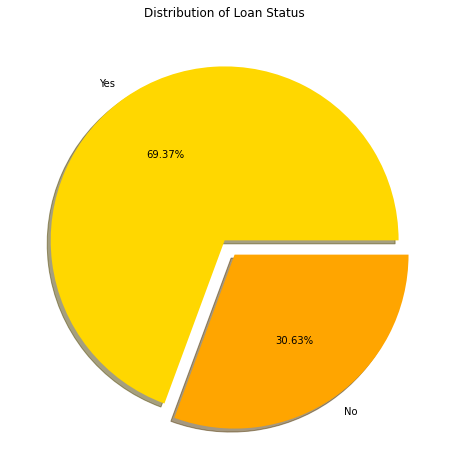

In [40]:
plt.figure(figsize=(8,8))
size=[376,166]
explode=[0.0,0.1]
labels=["Yes","No"]
color=["gold","orange"]
plt.pie(size,explode, labels,color, autopct='%1.2f%%',shadow=True)
plt.title('Distribution of Loan Status')

([], <a list of 0 Text major ticklabel objects>)

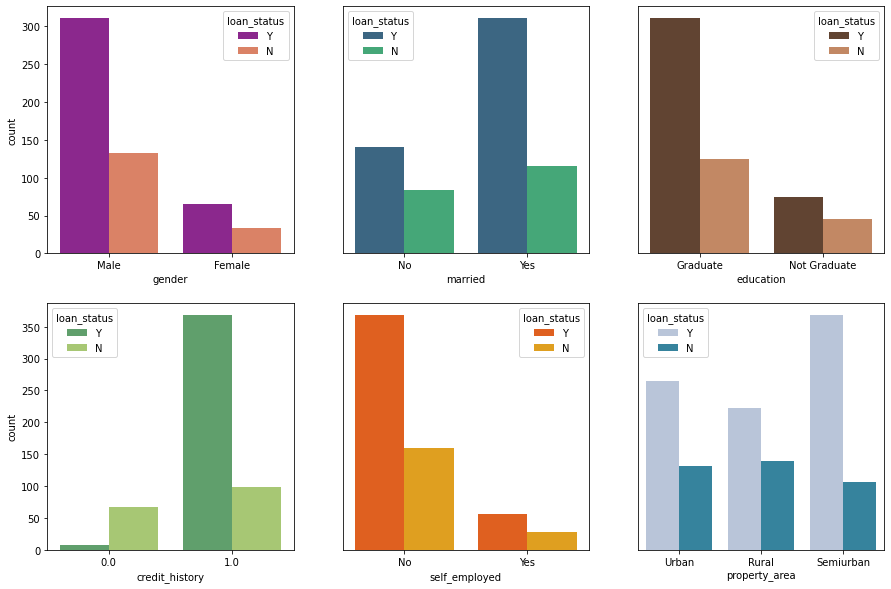

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',data=df,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

In [42]:
# px.sunburst( data_frame=df,path=['gender','loan_status'], color='loan_amount')

([], <a list of 0 Text major ticklabel objects>)

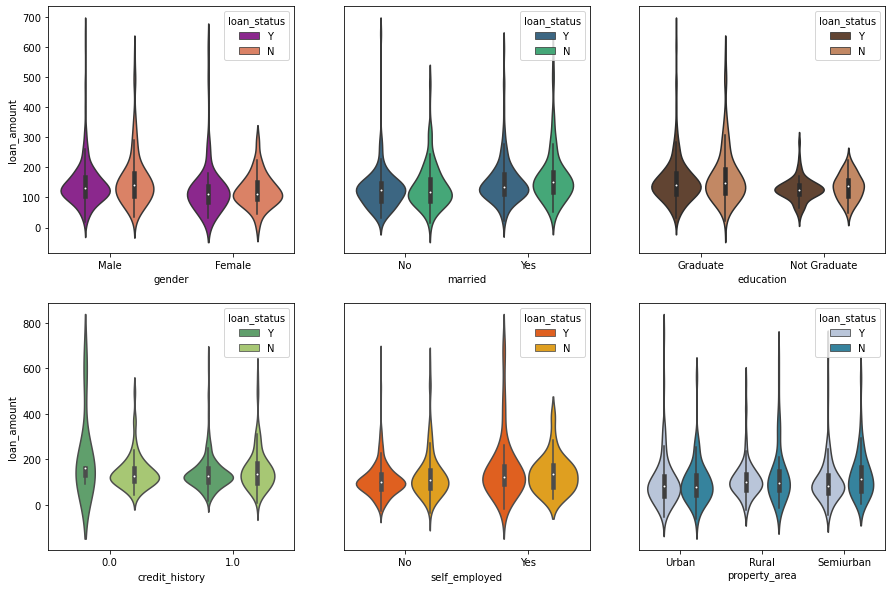

In [43]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

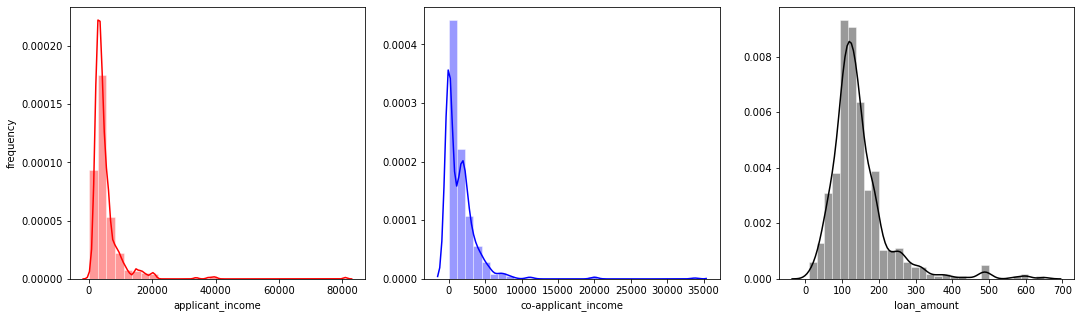

In [44]:
plt.figure(figsize=(18,5))


plt.subplot(1,3,1)
sns.distplot(df['applicant_income'],bins=30,color='r',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,2)
sns.distplot(df['co-applicant_income'],bins=30,color='blue',hist_kws=dict(edgecolor='white'))

plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='black',hist_kws=dict(edgecolor='white'))

In [45]:
# px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

### 3-2-Encoding

####  3-2-1-gender

In [46]:
model1=LabelEncoder()

In [47]:
model1.fit(df['gender'])

LabelEncoder()

In [48]:
df['gender']= model1.transform(df['gender'])

#### 3-2-2-married

In [49]:
model2=LabelEncoder()

In [50]:
model2.fit(df['married'])

LabelEncoder()

In [51]:
df['married']= model2.transform(df['married'])

#### 3-2-3-education

In [52]:
model3=LabelEncoder()

In [53]:
model3.fit(df['education'])

LabelEncoder()

In [54]:
df['education']= model3.transform(df['education'])

#### 3-2-4-self_employed

In [55]:
model4=LabelEncoder()

In [56]:
model4.fit(df['self_employed'])

LabelEncoder()

In [57]:
df['self_employed']= model4.transform(df['self_employed'])

#### 3-2-5-property_area

In [58]:
model5=LabelEncoder()

In [59]:
model5.fit(df['property_area'])

LabelEncoder()

In [60]:
df['property_area']= model5.transform(df['property_area'])

In [61]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y


#### 3-2-6-loan status

In [62]:
model6=LabelEncoder()

In [63]:
model6.fit(df['loan_status'])

LabelEncoder()

In [64]:
df['loan_status']= model6.transform(df['loan_status'])

In [65]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [66]:
df.corr()

,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
gender,1.000000,0.354860,0.201013,0.060067,-0.019980,0.041987,0.159611,0.110581,-0.094465,0.022618,-0.001761,0.031047
married,0.354860,1.000000,0.364153,0.012897,-0.012630,0.030757,0.113388,0.157788,-0.115536,0.027905,0.020687,0.107162
dependents,0.201013,0.364153,1.000000,0.070886,0.059697,0.113678,-0.023300,0.140333,-0.099785,-0.042867,-0.003589,0.010751
education,0.060067,0.012897,0.070886,1.000000,-0.015456,-0.139722,-0.074726,-0.163719,-0.099649,-0.052581,-0.041436,-0.079447
self_employed,-0.019980,-0.012630,0.059697,-0.015456,1.000000,0.166528,-0.025008,0.131328,-0.029640,-0.027392,-0.041443,-0.023526
applicant_income,0.041987,0.030757,0.113678,-0.139722,0.166528,1.000000,-0.103427,0.510678,0.002677,-0.052919,-0.053146,-0.044812
co-applicant_income,0.159611,0.113388,-0.023300,-0.074726,-0.025008,-0.103427,1.000000,0.191007,-0.010942,0.000103,0.000742,-0.040495
loan_amount,0.110581,0.157788,0.140333,-0.163719,0.131328,0.510678,0.191007,1.000000,0.075725,-0.033180,-0.075312,-0.060531
loan_amount_term,-0.094465,-0.115536,-0.099785,-0.099649,-0.029640,0.002677,-0.010942,0.075725,1.000000,0.023401,-0.066333,-0.005593
credit_history,0.022618,0.027905,-0.042867,-0.052581,-0.027392,-0.052919,0.000103,-0.033180,0.023401,1.000000,0.000329,0.516853


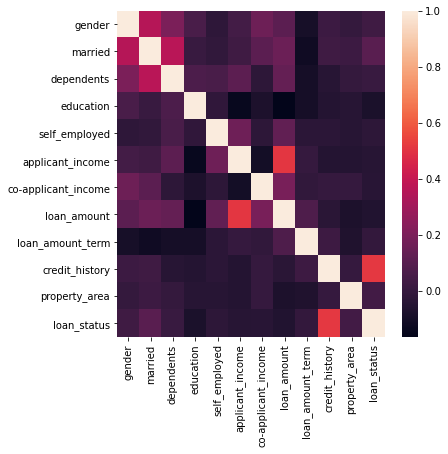

In [67]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr())

In [68]:
a=np.zeros_like(df.corr())
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Text(0.5, 1.0, 'Correlation Matrix for Loan Status')

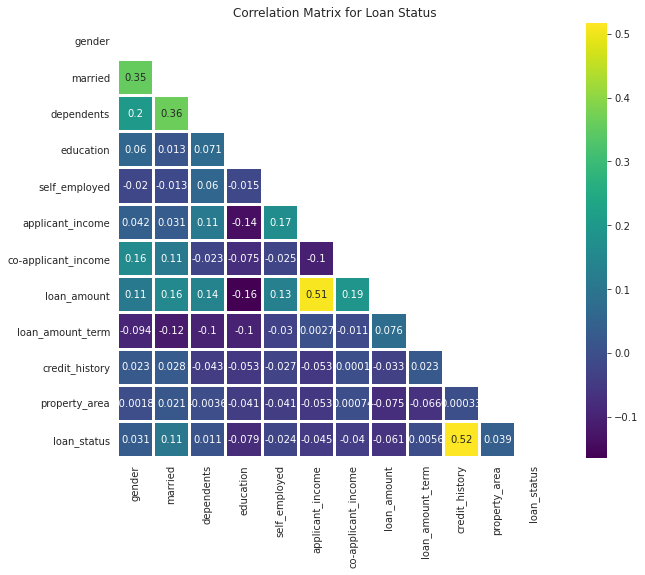

In [69]:
plt.figure(figsize=(12,8))

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

### *
- From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### 4-Prediction

#### 4-1-LogisticRegression

In [70]:
X=df.drop(['loan_id','loan_status'],axis=1)
y=df['loan_status']

In [71]:
print(df)

      loan_id  gender  married  dependents  education  self_employed  \
0    LP001002       1        0           0          0              0   
1    LP001003       1        1           1          0              0   
2    LP001005       1        1           0          0              1   
3    LP001006       1        1           0          1              0   
4    LP001008       1        0           0          0              0   
..        ...     ...      ...         ...        ...            ...   
609  LP002978       0        0           0          0              0   
610  LP002979       1        1           3          0              0   
611  LP002983       1        1           1          0              0   
612  LP002984       1        1           2          0              0   
613  LP002990       0        0           0          0              1   

     applicant_income  co-applicant_income  loan_amount  loan_amount_term  \
0                5849                  0.0   146.412162   

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [73]:
lr=LogisticRegression()

In [74]:
lr.fit(X_train, y_train)

C:\Users\Rgarud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
lr_prediction=lr.predict(X_test)

In [111]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,lr_prediction))
print('\n')
print("Classification Report: \n")
print(classification_report(y_test,lr_prediction))
print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

Confusion Matrix: 
[[10 21]
 [ 0 78]]


Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.79      1.00      0.88        78

    accuracy                           0.81       109
   macro avg       0.89      0.66      0.68       109
weighted avg       0.85      0.81      0.77       109



Logistic Regression accuracy:  0.8073394495412844


### 4-2-Decision Tree

In [77]:
dt=DecisionTreeClassifier()

In [78]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
dt_prediction=dt.predict(X_test)

In [112]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,dt_prediction))
print('\n')
print("Classification Report: \n")
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

Confusion Matrix: 
[[13 18]
 [21 57]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        31
           1       0.76      0.73      0.75        78

    accuracy                           0.64       109
   macro avg       0.57      0.58      0.57       109
weighted avg       0.65      0.64      0.65       109



Decision Tree Accuracy:  0.6422018348623854


### 4-3-Random Forest

In [81]:
rf=RandomForestClassifier(n_estimators=200)

In [82]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [83]:
rf_prediction=rf.predict(X_test)

In [113]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,rf_prediction))
print('\n')
print("Classification Report: \n")
print(classification_report(y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))

Confusion Matrix: 
[[13 18]
 [ 6 72]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.68      0.42      0.52        31
           1       0.80      0.92      0.86        78

    accuracy                           0.78       109
   macro avg       0.74      0.67      0.69       109
weighted avg       0.77      0.78      0.76       109



Random Forest Accuracy:  0.7798165137614679


### 4-4-KNearest Neighbors

In [85]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.3853211009174312, 0.48623853211009177, 0.4036697247706422, 0.44954128440366975, 0.43119266055045874, 0.45871559633027525, 0.3486238532110092, 0.3669724770642202, 0.3302752293577982, 0.3302752293577982, 0.3119266055045872, 0.3394495412844037, 0.29357798165137616, 0.30275229357798167, 0.29357798165137616, 0.3119266055045872, 0.3211009174311927, 0.29357798165137616, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.26605504587155965, 0.26605504587155965, 0.27522935779816515, 0.27522935779816515, 0.28440366972477066, 0.27522935779816515, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066]


Text(0.5, 1.0, 'Elbow Method')

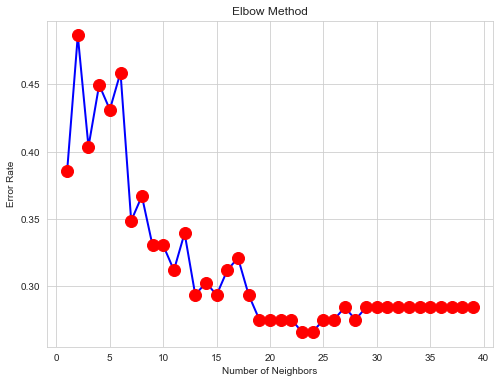

In [86]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [87]:
knn=KNeighborsClassifier(n_neighbors=23)

In [88]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [89]:
knn_prediction=knn.predict(X_test)

In [114]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,knn_prediction))
print('\n')
print("Classification Report: \n")
print(classification_report(y_test,knn_prediction))
print('\n')
print('KNN accuracy Accuracy: ', accuracy_score(y_test,knn_prediction))

Confusion Matrix: 
[[ 2 29]
 [ 0 78]]


Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.06      0.12        31
           1       0.73      1.00      0.84        78

    accuracy                           0.73       109
   macro avg       0.86      0.53      0.48       109
weighted avg       0.81      0.73      0.64       109



KNN accuracy Accuracy:  0.7339449541284404


### 4-5-SVC

In [91]:
svc=SVC()

In [92]:
svc.fit(X_train, y_train)

SVC()

In [93]:
svc_prediction=svc.predict(X_test)

In [115]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print("Classification Report: \n")
print(classification_report(y_test,svc_prediction))
print('\n')
print('SVC َAccuracy: ', accuracy_score(y_test,svc_prediction))

Confusion Matrix: 
[[ 0 31]
 [ 1 77]]


Classification Report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.71      0.99      0.83        78

    accuracy                           0.71       109
   macro avg       0.36      0.49      0.41       109
weighted avg       0.51      0.71      0.59       109



SVC َAccuracy:  0.7064220183486238


In [95]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8073394495412844
Decision Tree Accuracy:  0.6422018348623854
Random Forest Accuracy:  0.7798165137614679
KNN Accuracy:  0.7339449541284404
SVC Accuracy:  0.7064220183486238


### CONCLUSION
- The Loan Status is heavily dependent on the Credit History for Predictions.

- The Logistic Regression algorithm gives us the maximum Accuracy (80%) compared to the other 4 Machine Learning Classification Algorithms.